## Analyse et Prédiction du Risque de Diabète


 Ce projet vise à segmenter les données de patients à risque de diabète en utilisant des modèles de clustering (comme K-Means). Une classification supervisée est ensuite appliquée pour prédire le risque de diabète avec précision, en évaluant plusieurs algorithmes (Random Forest, SVM, etc.) et en optimisant leurs performances.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df =  pd.read_csv("dataset-diabete.csv",index_col=0)

print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


## Analyser la structure

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [5]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [6]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [7]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


Analyser la distribution des variables numériques.

In [8]:
df_numeriques =  df.select_dtypes(include =['int','float'])
df_categoriques = df.select_dtypes(include=["object"])

In [9]:
df_numeriques.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Créer la matrice de corrélation

In [10]:
correlation_matrix = df_numeriques.corr()

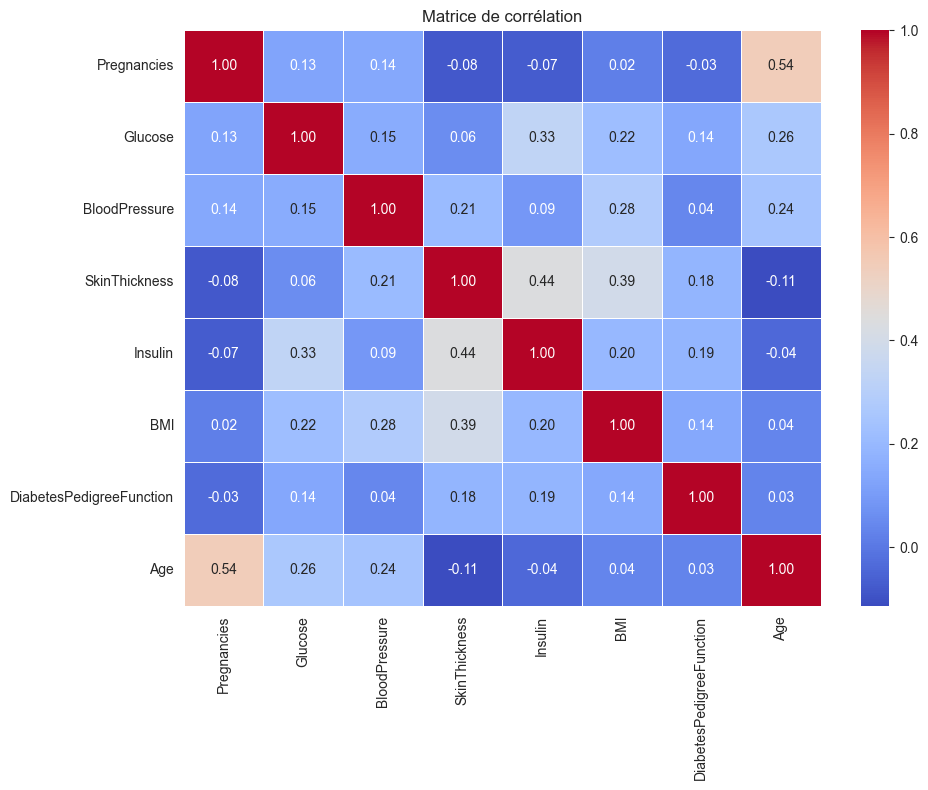

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

 ### Prétraitement des données - Gestion des valeurs manquantes et aberrantes

Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent.

In [12]:
import numpy as np

cols_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_replace_zero] = df[cols_replace_zero].replace(0, np.nan)

In [13]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [14]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

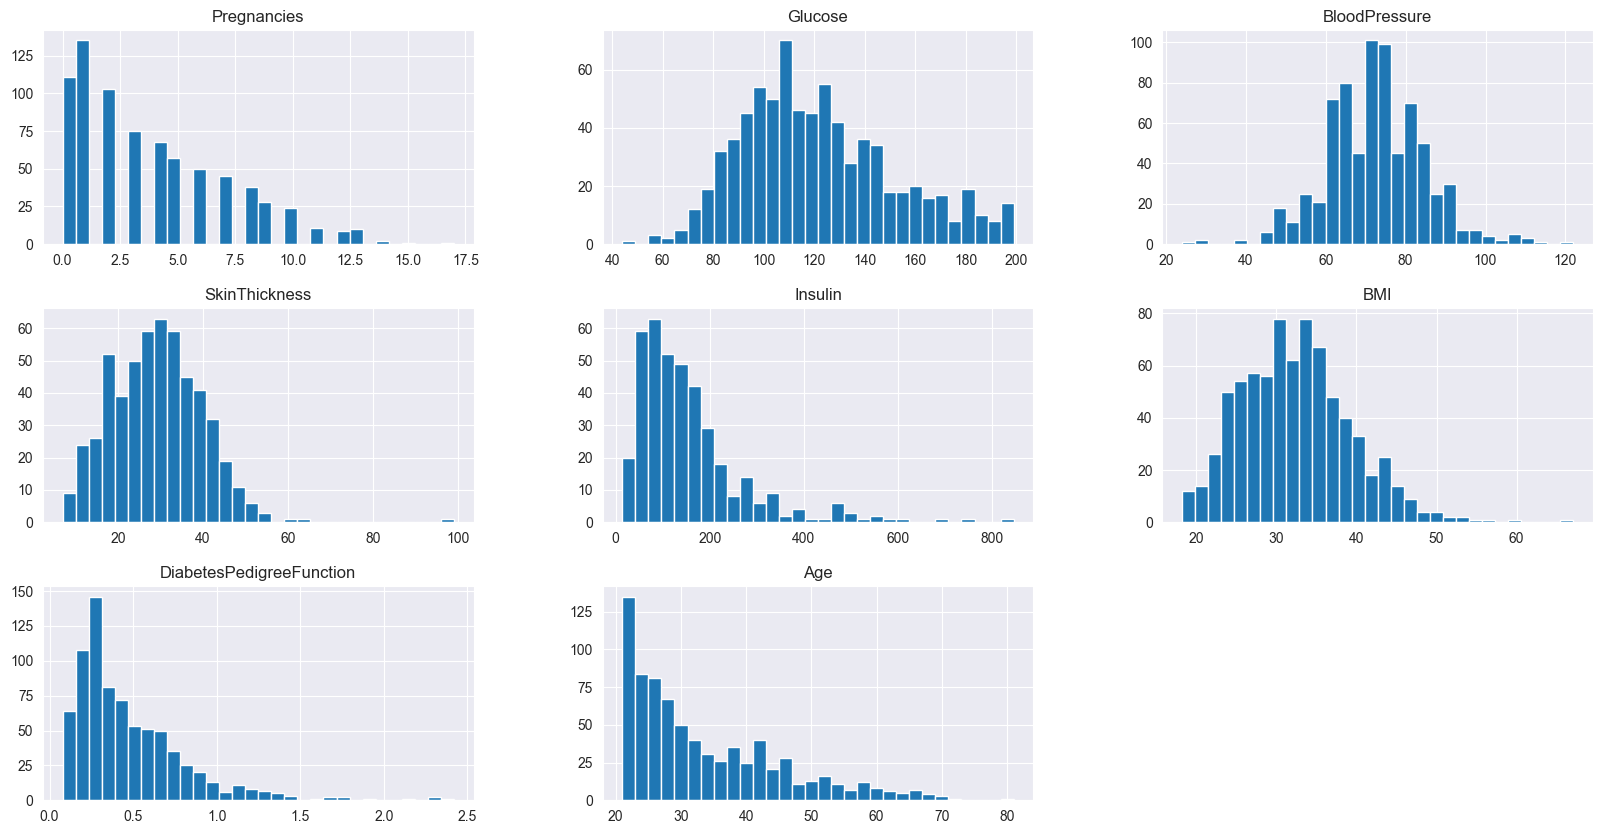

In [15]:
df.hist(bins=30 ,figsize=(20,10))
plt.show()



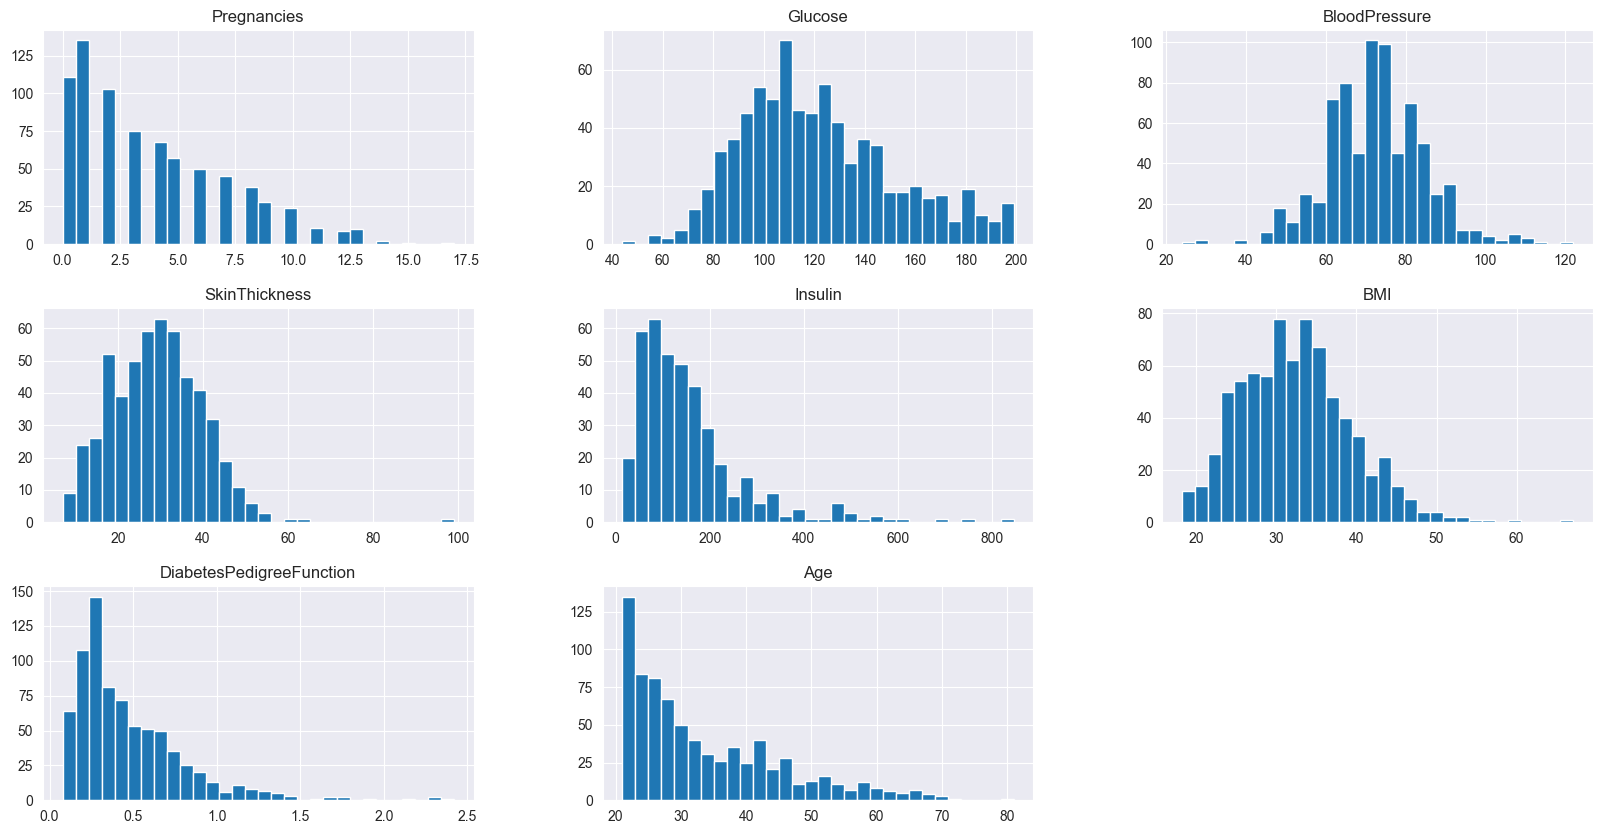

In [16]:
df.hist(bins=30 ,figsize=(20,10))
plt.show()

## KNN

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import zscore

print("Original data shape:", df_numeriques.shape)
print("Missing values before KNN imputation:")
print(df_numeriques.isnull().sum())

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

df_imputed = pd.DataFrame(
    knn_imputer.fit_transform(df_numeriques),
    columns=df_numeriques.columns,
    index=df_numeriques.index
)

print("\nAfter KNN imputation:")
print("Missing values:", df_imputed.isnull().sum().sum())
print(df_imputed)

Original data shape: (768, 8)
Missing values before KNN imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

After KNN imputation:
Missing values: 0
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0      

 ## Détecter outliers avec boîte à moustaches

Appliquer méthode IQR pour détecter outliers

In [18]:
IQRs = {}
for col in df_imputed.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 3*IQR) | (df[col] > Q3 + 3*IQR)]
    print(f'Outliers dans {col}:')
    print(outliers[[col]])

Outliers dans Pregnancies:
Empty DataFrame
Columns: [Pregnancies]
Index: []
Outliers dans Glucose:
Empty DataFrame
Columns: [Glucose]
Index: []
Outliers dans BloodPressure:
Empty DataFrame
Columns: [BloodPressure]
Index: []
Outliers dans SkinThickness:
     SkinThickness
579           99.0
Outliers dans Insulin:
     Insulin
8      543.0
13     846.0
228    744.0
247    680.0
286    545.0
409    579.0
584    600.0
655    540.0
Outliers dans BMI:
      BMI
177  67.1
Outliers dans DiabetesPedigreeFunction:
     DiabetesPedigreeFunction
4                       2.288
45                      1.893
58                      1.781
228                     2.329
370                     2.137
445                     2.420
Outliers dans Age:
Empty DataFrame
Columns: [Age]
Index: []


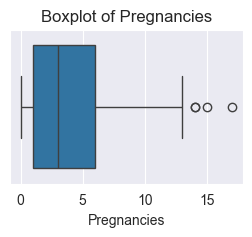

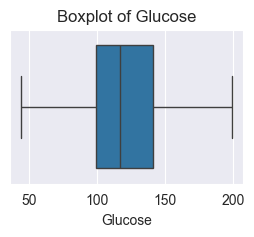

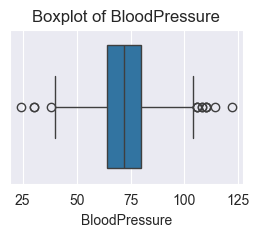

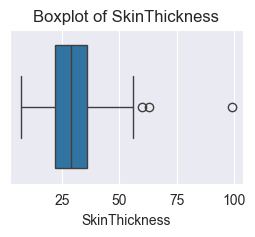

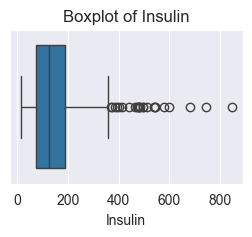

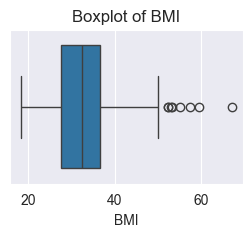

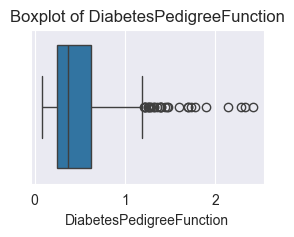

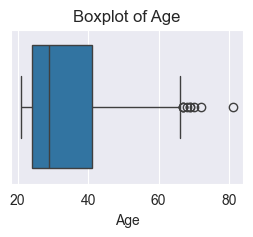

In [19]:
import seaborn

for col in df_imputed.columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Appliquer méthode Z-score


--- Pregnancies ---
Upper limit: 13.95
Lower limit: -6.26
Number of outliers: 4
Before removing outliers: 768
After removing outliers: 764
Total outliers removed: 4


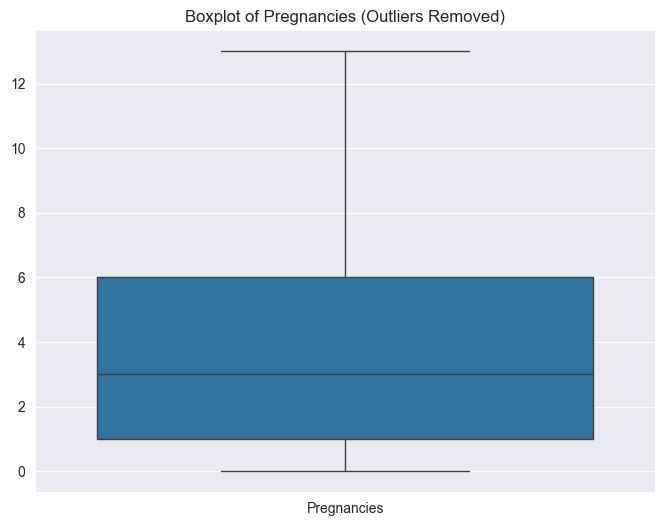


--- Glucose ---
Upper limit: 216.81
Lower limit: 24.98
Number of outliers: 5
Before removing outliers: 768
After removing outliers: 759
Total outliers removed: 9


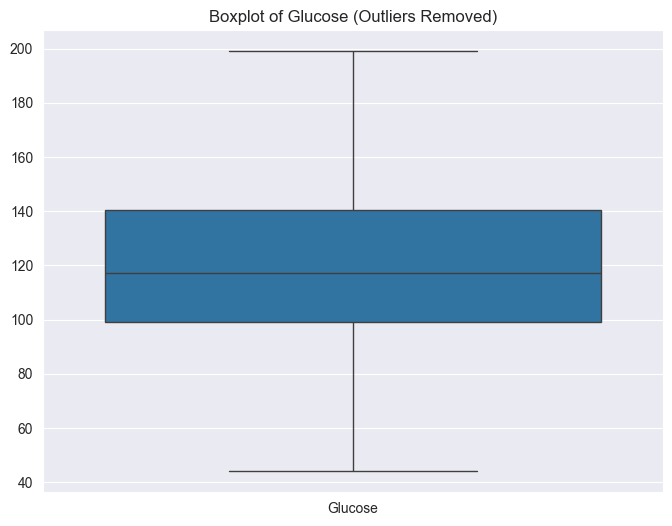


--- BloodPressure ---
Upper limit: 127.17
Lower limit: 11.04
Number of outliers: 35
Before removing outliers: 768
After removing outliers: 724
Total outliers removed: 44


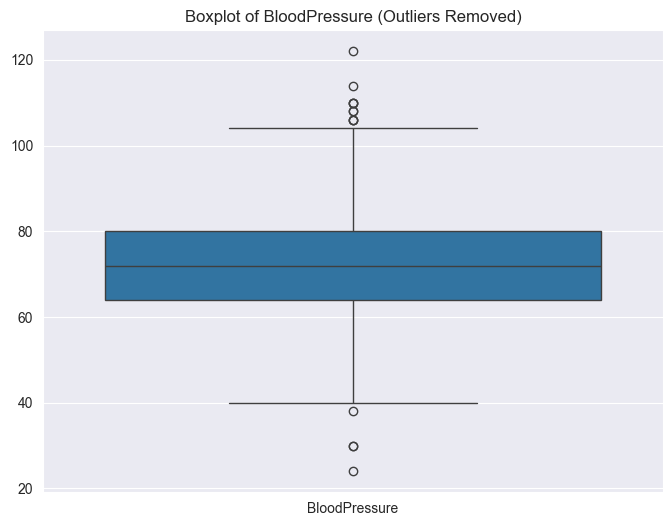


--- SkinThickness ---
Upper limit: 68.39
Lower limit: -27.32
Number of outliers: 1
Before removing outliers: 768
After removing outliers: 723
Total outliers removed: 45


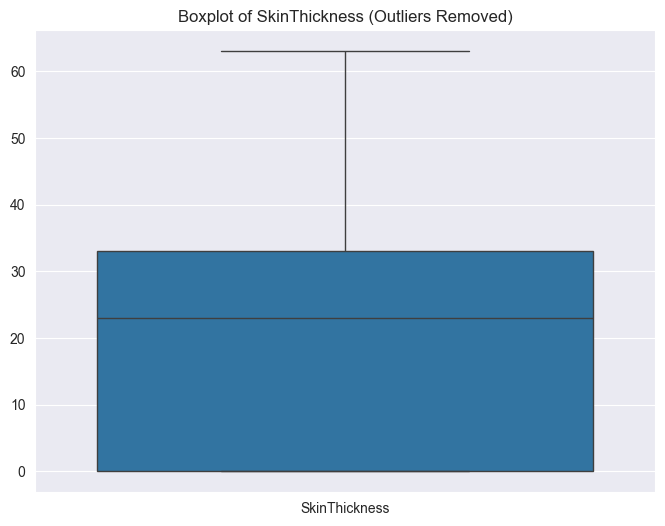


--- Insulin ---
Upper limit: 425.53
Lower limit: -265.93
Number of outliers: 18
Before removing outliers: 768
After removing outliers: 705
Total outliers removed: 63


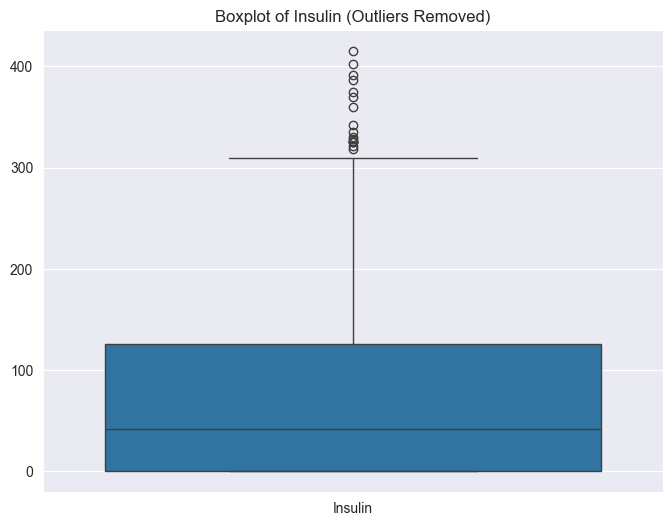


--- BMI ---
Upper limit: 55.65
Lower limit: 8.34
Number of outliers: 14
Before removing outliers: 768
After removing outliers: 698
Total outliers removed: 70


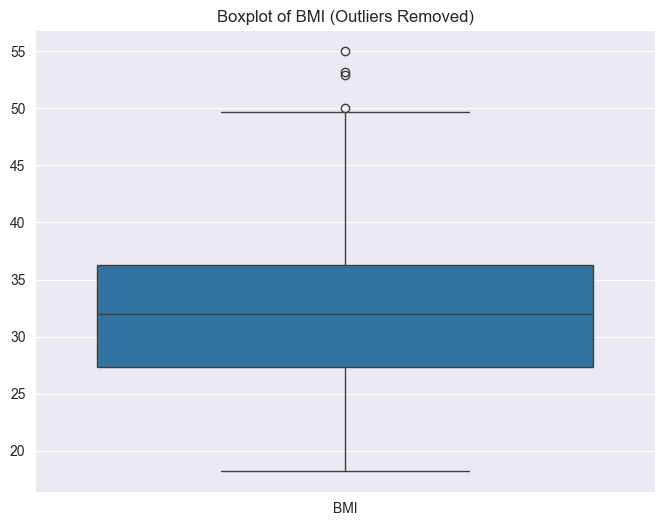


--- DiabetesPedigreeFunction ---
Upper limit: 1.47
Lower limit: -0.52
Number of outliers: 11
Before removing outliers: 768
After removing outliers: 691
Total outliers removed: 77


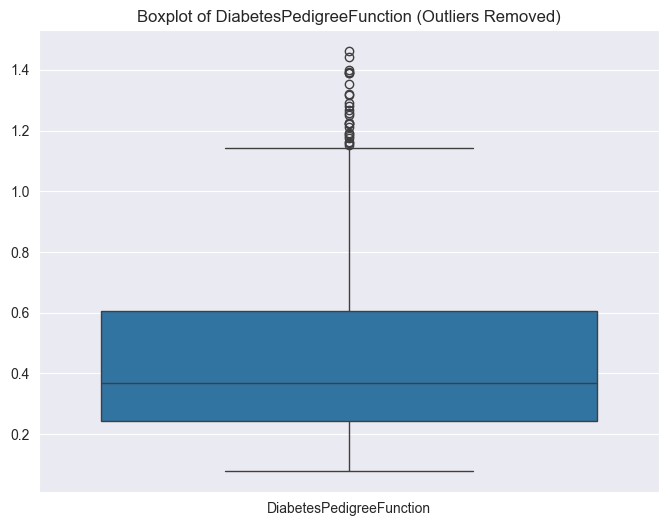


--- Age ---
Upper limit: 68.52
Lower limit: -2.04
Number of outliers: 5
Before removing outliers: 768
After removing outliers: 688
Total outliers removed: 80


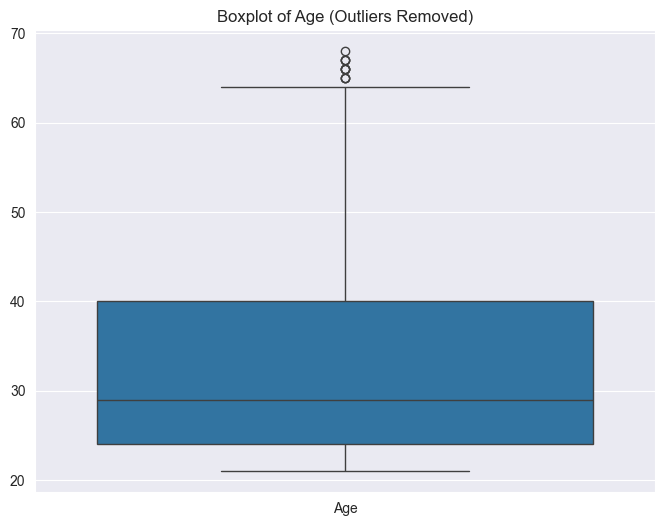

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned = df_imputed.copy()

for col in df_imputed.columns:
    upper_limit = df_imputed[col].mean() + 3 * df_imputed[col].std()
    lower_limit = df_imputed[col].mean() - 3 * df_imputed[col].std()
    print(f'\n--- {col} ---')
    print(f'Upper limit: {upper_limit:.2f}')
    print(f'Lower limit: {lower_limit:.2f}')
    outliers = df_imputed.loc[(df_imputed[col] > upper_limit) | (df_imputed[col] < lower_limit)]
    print(f'Number of outliers: {len(outliers)}')
    df_cleaned = df_cleaned.loc[(df_cleaned[col] <= upper_limit) & (df_cleaned[col] >= lower_limit)]
    print(f'Before removing outliers: {len(df_imputed)}')
    print(f'After removing outliers: {len(df_cleaned)}')
    print(f'Total outliers removed: {len(df_imputed) - len(df_cleaned)}')
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_cleaned[[col]])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.show()

Étudier les relations entre variables

In [21]:
correlation_matrix = df_cleaned.corr()


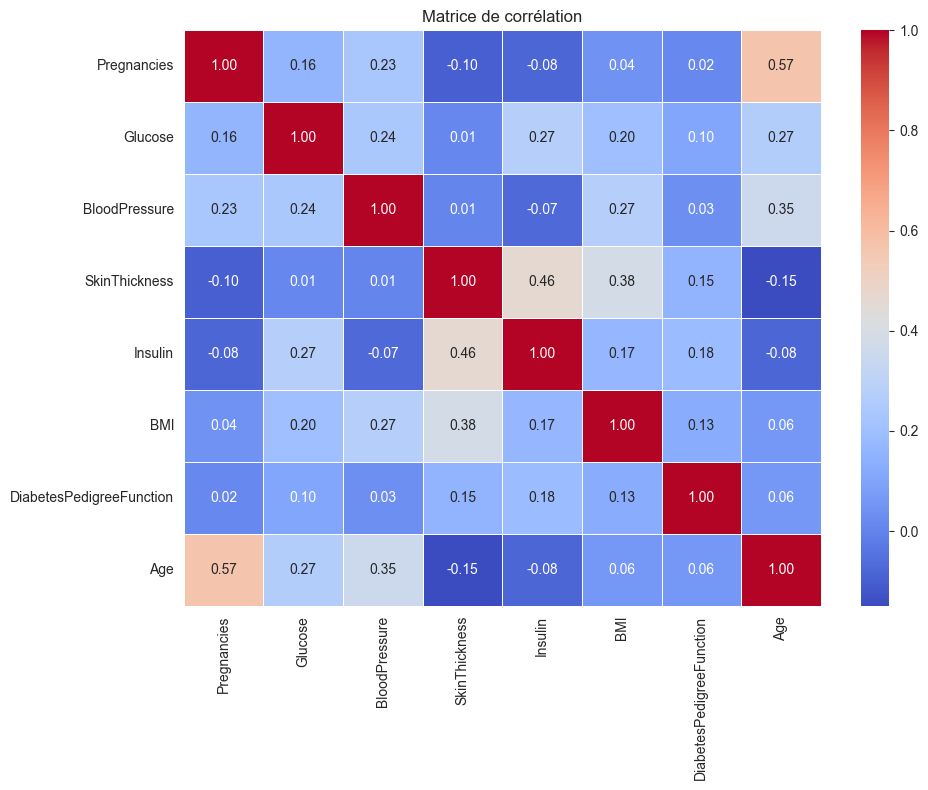

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

## Sélectionner variables à forte variabilité

In [23]:
df_cleaned.var()

Pregnancies                   10.753521
Glucose                      900.347441
BloodPressure                151.606505
SkinThickness                237.326081
Insulin                     8119.260500
BMI                           43.809712
DiabetesPedigreeFunction       0.080956
Age                          130.804744
dtype: float64

## Visualiser relations via pairplot

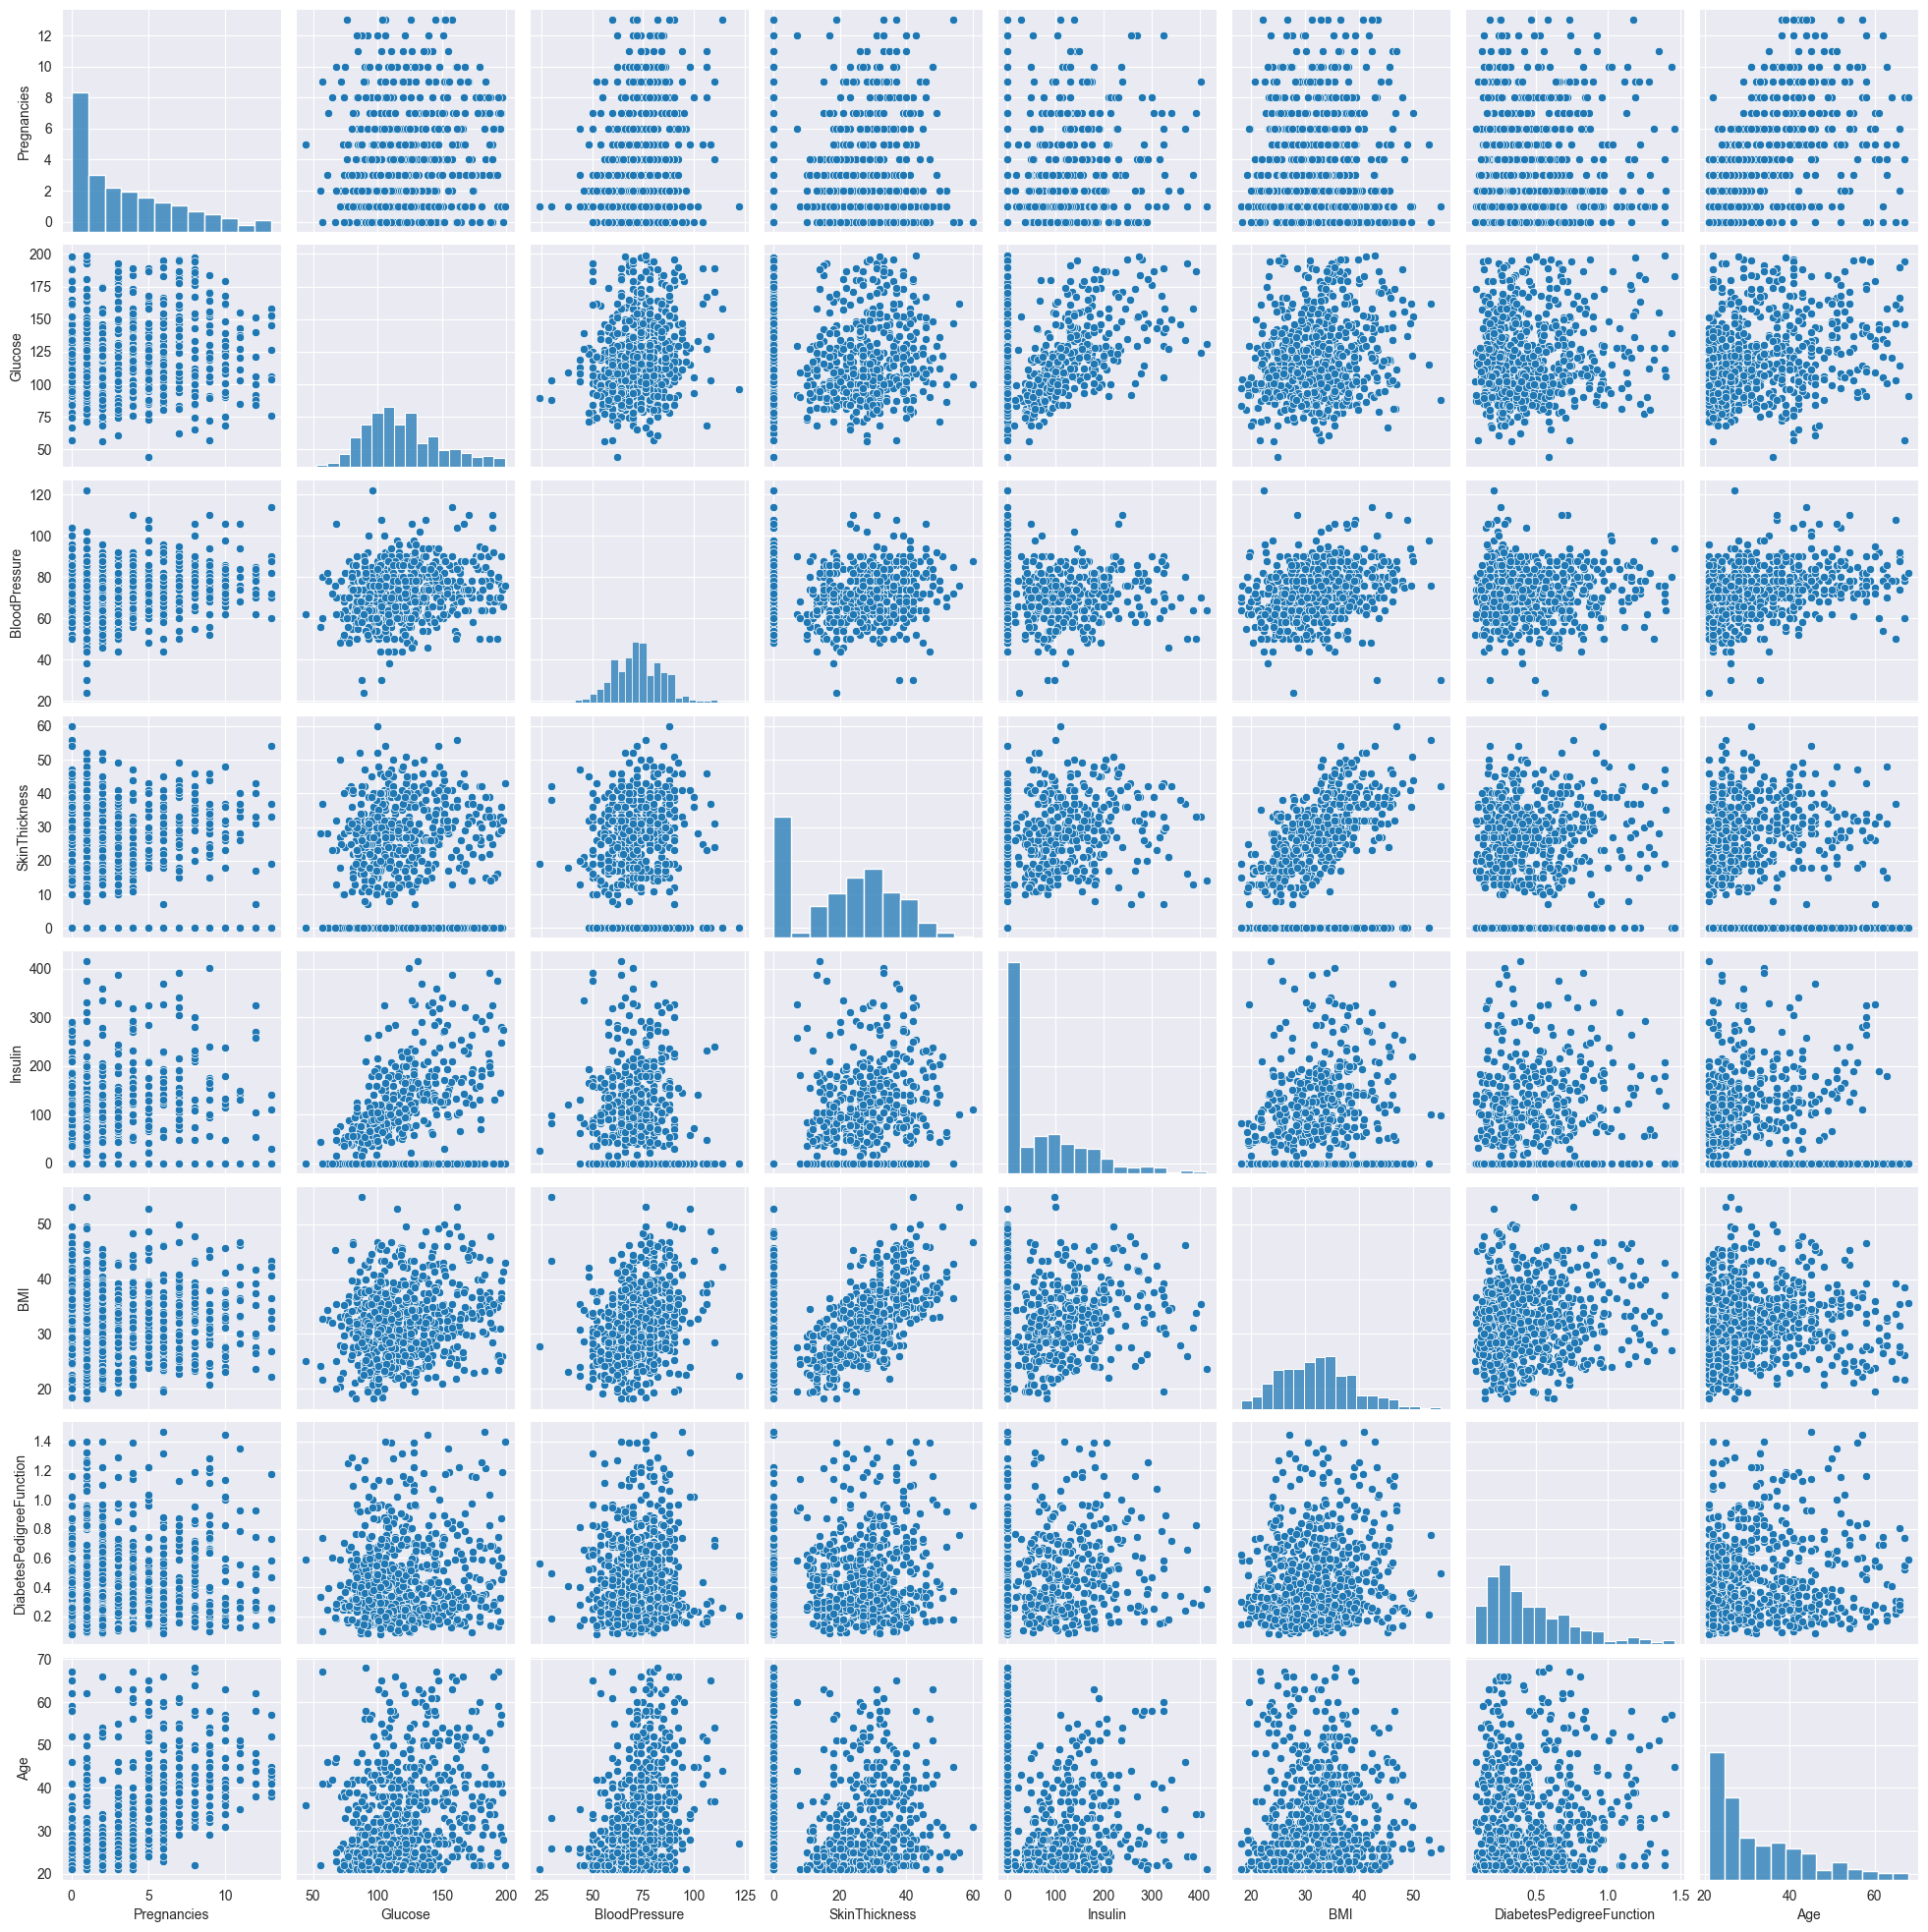

In [24]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(df_cleaned)
plt.show()

## Appliquer StandardScaler ou MinMaxScaler

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)




## Appliquer méthode du coude (Elbow)

Taille du dataset: 688 observations, 8 variables
Plage k optimisée: 2 à 10


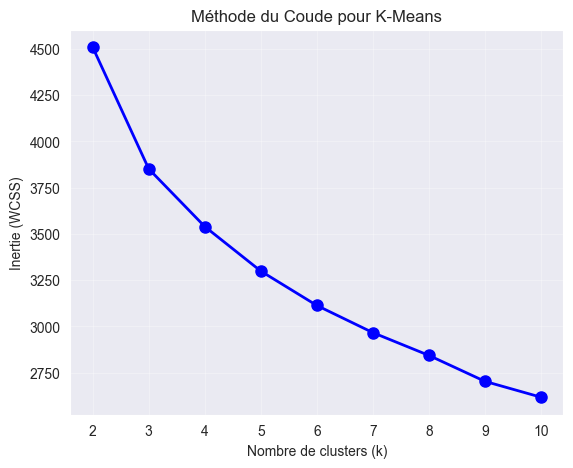

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Déterminer la plage k adaptative
n_samples = len(scaled_data)
n_features = scaled_data.shape[1]

if n_samples < 100:
    k_max = min(8, n_samples // 5)
elif n_samples > 1000:
    k_max = 15
else:
    k_max = 10

print(f"Taille du dataset: {n_samples} observations, {n_features} variables")
print(f"Plage k optimisée: 2 à {k_max}")

# 2. Calcul unique pour toutes les métriques
k_range = range(2, k_max + 1)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)

    # Stocker les deux métriques en un seul passage
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

# 3. Visualisation combinée
plt.figure(figsize=(14, 5))

# Méthode du coude
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (WCSS)')
plt.title('Méthode du Coude pour K-Means')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-', markersize=8, linewidth=2)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de Silhouette Moyen')
plt.title('Analyse de Silhouette pour K-Means')
plt.grid(True, alpha=0.3)

optimal_k = k_range[np.argmax(silhouette_scores)]
plt.axvline(x=optimal_k, color='red', linestyle='--',
            label=f'k optimal = {optimal_k}')
plt.legend()

plt.tight_layout()
plt.show()

